# **–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏**

In [1]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# **–ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö**

In [2]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö (
train = pd.read_csv('/content/Task5_train.csv')
test = pd.read_csv('/content/Task5_test.csv')

In [ ]:
# –ü—Ä–æ—Å–º–æ—Ç—Ä –¥–∞–Ω–Ω—ã—Ö
print(train.head())
print(train.info())
print(train.describe())

          Y        X1         X2         X3         X4        X5        X6  \
0  0.146442 -3.375223 -10.380706  14.488187  42.433324  3.567948 -0.407952   
1  0.488790 -3.071530 -22.425550   4.060582  19.652617 -7.134599 -7.201065   
2  0.209077  2.512906  11.003405  13.591295  -6.510962 -1.534895 -3.742965   
3  0.621051  0.485973 -15.891477  34.422507  -3.772496 -3.618411  3.278072   
4  0.875695 -8.140371   6.173805   6.635861   4.463215 -0.964935  5.543937   

         X7         X8         X9  ...       X111      X112       X113  \
0 -0.778009  -6.806665   0.304032  ...  17.842198 -4.235979  -3.090988   
1 -0.175808  33.717211  -2.658686  ...  10.305863 -0.077751 -16.040180   
2  0.455756  30.643341  -0.766931  ...   2.116266 -6.212255 -30.838870   
3 -0.229292 -11.056757  40.921275  ...  13.309494 -6.547626 -26.224855   
4  0.862716 -11.539494  21.111441  ...  12.194029 -4.621176 -11.836028   

        X114       X115       X116       X117       X118       X119       X120  
0 -16

In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤
data.isnull().sum()

Y       0
X1      0
X2      0
X3      0
X4      0
       ..
X116    0
X117    0
X118    0
X119    0
X120    0
Length: 121, dtype: int64

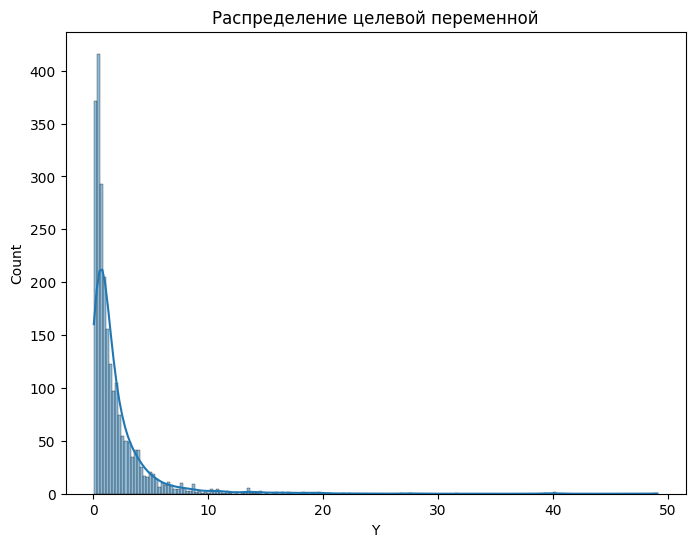

In [ ]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π Y
plt.figure(figsize=(8, 6))
sns.histplot(train['Y'], kde=True)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π")
plt.show()

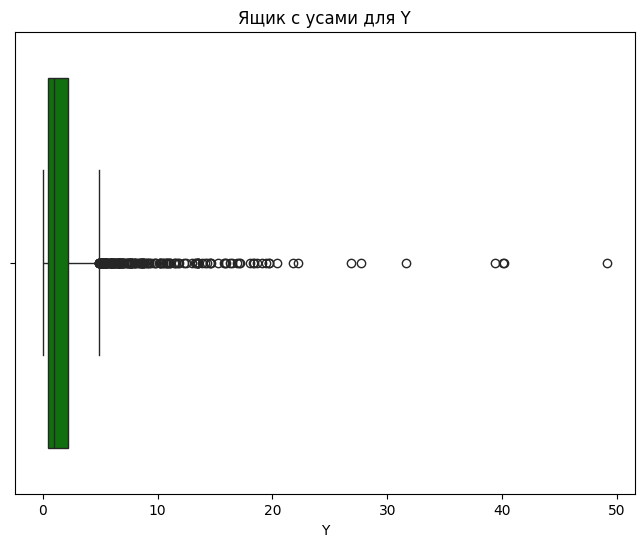

In [ ]:
# Boxplot –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['Y'], color='green')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è Y')
plt.xlabel('Y')
plt.show()

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è Y —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏:
 Y       1.000000
X113    0.457529
X54     0.415081
X21     0.380102
X77     0.346491
          ...   
X96    -0.274195
X59    -0.297336
X64    -0.300430
X107   -0.368785
X55    -0.392494
Name: Y, Length: 121, dtype: float64


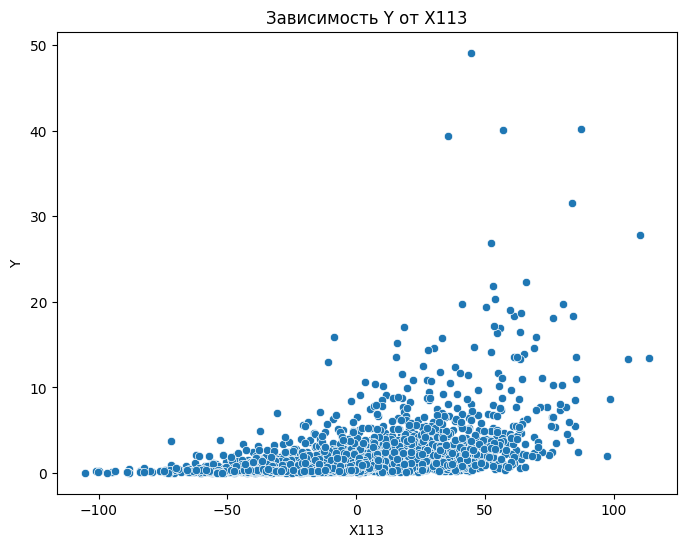

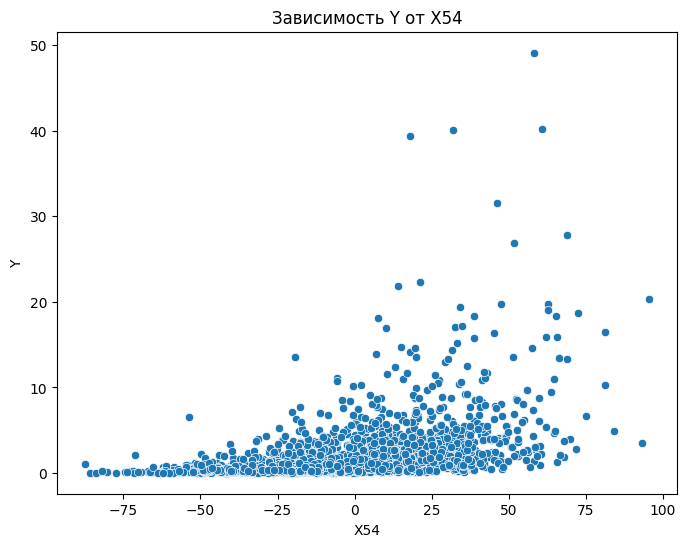

In [ ]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è Y —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
correlations = train.corr()['Y'].sort_values(ascending=False)
print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è Y —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏:\n", correlations)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å —Ç–æ–ø-2 –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏)
top_features = correlations.index[1:3]  # –ü–µ—Ä–≤–æ–µ - —ç—Ç–æ Y
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train[feature], y=train['Y'])
    plt.title(f'–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å Y –æ—Ç {feature}')
    plt.xlabel(feature)
    plt.ylabel('Y')
    plt.show()

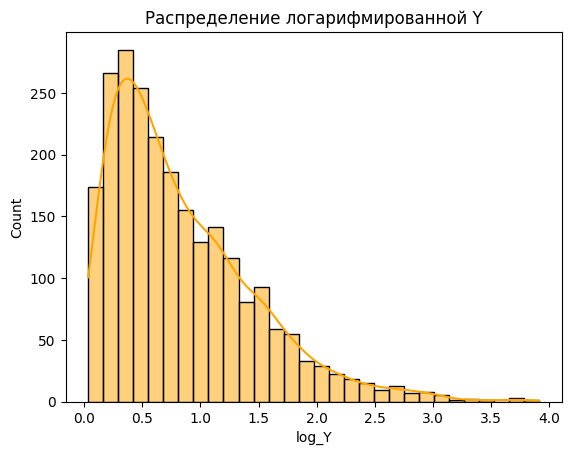

In [ ]:
# –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ Y (–ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ –¥–ª–∏–Ω–Ω–æ–≥–æ —Ö–≤–æ—Å—Ç–∞)
train['log_Y'] = np.log1p(train['Y'])  # log(1 + Y)
sns.histplot(train['log_Y'], kde=True, bins=30, color='orange')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π Y')
plt.show()

**–í—ã–≤–æ–¥—ã:**

1. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏–º–µ–µ—Ç –≤—ã—Ä–∞–∂–µ–Ω–Ω—ã–π –ø—Ä–∞–≤—ã–π —Å–∫–æ—à–µ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä —Å –¥–ª–∏–Ω–Ω—ã–º —Ö–≤–æ—Å—Ç–æ–º, —Ç—è–Ω—É—â–∏–º—Å—è –≤ –æ–±–ª–∞—Å—Ç—å –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –≠—Ç–æ –º–æ–∂–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ –Ω–∞–ª–∏—á–∏–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π.

2. –ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ boxplot —Ç–∞–∫–∂–µ –≤–∏–¥–Ω–æ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –∏—Å–∫–∞–∂–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –í–∞–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å, —á—Ç–æ —Ç–∞–∫–∏–µ –≤—ã–±—Ä–æ—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å –∫–∞–∫ –æ—à–∏–±–∫–∞–º–∏ –≤ –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∏ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã–º–∏ –∞–Ω–æ–º–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –æ—Ç—Ä–∞–∂–∞—é—â–∏–º–∏ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –∏—Å—Å–ª–µ–¥—É–µ–º–æ–π –æ–±–ª–∞—Å—Ç–∏.

3. –ü–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–æ–ª–µ–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –∏ –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É, —á—Ç–æ –º–æ–∂–µ—Ç —É–ª—É—á—à–∞—Ç—å –≤ –ø—Ä–µ—Å–ø–µ–∫—Ç–∏–≤–µ –ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

–û–¥–Ω–∞–∫–æ –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –ø—Ä–∏–Ω—è—Ç—å —Ä–µ—à–µ–Ω–∏–µ –æ –º–µ—Ç–æ–¥–∞—Ö –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—ã–±—Ä–æ—Å–æ–≤, –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–æ –ø–æ–Ω—è—Ç—å –∏—Ö –ø—Ä–∏—Ä–æ–¥—É. –ï—Å–ª–∏ –≤—ã–±—Ä–æ—Å—ã —è–≤–ª—è—é—Ç—Å—è –∞—Ä—Ç–µ—Ñ–∞–∫—Ç–∞–º–∏ –¥–∞–Ω–Ω—ã—Ö, –∏—Ö —Å–ª–µ–¥—É–µ—Ç —É–¥–∞–ª–∏—Ç—å. –í —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ –≤—ã–±—Ä–æ—Å—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ, –Ω–æ —Ä–µ–¥–∫–∏–µ –∏ –≤–∞–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º –º–µ—Ç–æ–¥–æ–º, —á–µ–º –∏—Ö —É–¥–∞–ª–µ–Ω–∏–µ, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–æ –ø–æ–º–æ–≥–∞–µ—Ç —É–º–µ–Ω—å—à–∏—Ç—å –≤–ª–∏—è–Ω–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –±–µ–∑ –ø–æ—Ç–µ—Ä–∏ –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø–µ—Ä–µ–¥ –ø—Ä–∏–Ω—è—Ç–∏–µ–º —Ä–µ—à–µ–Ω–∏—è –≤–∞–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –¥–µ—Ç–∞–ª—å–Ω–æ–µ –∏–∑—É—á–µ–Ω–∏–µ –ø—Ä–∏—Ä–æ–¥—ã –≤—ã–±—Ä–æ—Å–æ–≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —á—Ç–æ–±—ã –≤—ã–±—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é —Å—Ç—Ä–∞—Ç–µ–≥–∏—é –∏—Ö –æ–±—Ä–∞–±–æ—Ç–∫–∏

In [4]:
# –í—ã—á–∏—Å–ª—è–µ–º –≥—Ä–∞–Ω–∏—Ü—ã –≤—ã–±—Ä–æ—Å–æ–≤ (IQR)
Q1 = train['Y'].quantile(0.25)
Q3 = train['Y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  –í—ã–¥–µ–ª—è–µ–º –≤—ã–±—Ä–æ—Å—ã
outliers = train[(train['Y'] < lower_bound) | (train['Y'] > upper_bound)]
non_outliers = train[(train['Y'] >= lower_bound) & (train['Y'] <= upper_bound)]

print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: {len(outliers)}")
print(f"–ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –¥–∞–Ω–Ω—ã—Ö: {len(outliers) / len(train) * 100:.2f}%")


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤: 200
–ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –¥–∞–Ω–Ω—ã—Ö: 8.42%


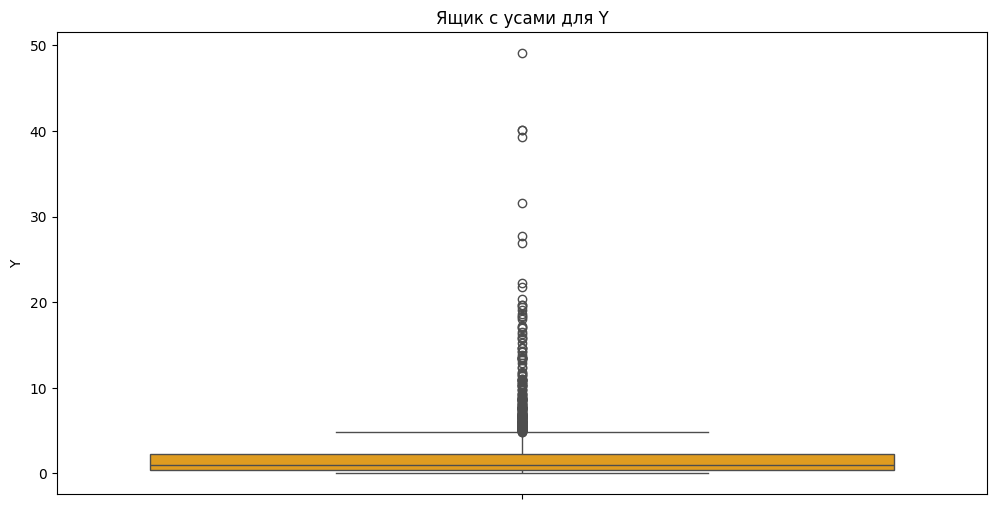

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –≤—ã–±—Ä–æ—Å—ã
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, y='Y', color='orange')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è Y')
plt.show()

In [5]:
# –í—ã–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –æ—Å–Ω–æ–≤–Ω–æ–π —á–∞—Å—Ç–∏
outliers = train[(train['Y'] < lower_bound) | (train['Y'] > upper_bound)]
non_outliers = train[(train['Y'] >= lower_bound) & (train['Y'] <= upper_bound)]

# –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
print("–•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –æ—Å–Ω–æ–≤–Ω–æ–π —á–∞—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö:")
print(non_outliers.describe())

print("\n–•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –≤—ã–±—Ä–æ—Å–æ–≤:")
print(outliers.describe())



–•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –æ—Å–Ω–æ–≤–Ω–æ–π —á–∞—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö:
                 Y           X1           X2           X3           X4  \
count  2175.000000  2175.000000  2175.000000  2175.000000  2175.000000   
mean      1.252014     0.308751    -1.243253    -1.733115     0.021213   
std       1.118428     9.218170    31.507384    20.625985    18.003819   
min       0.034963   -32.750508  -112.821002   -76.372344   -59.385102   
25%       0.408725    -5.897700   -21.652608   -15.106869   -11.873051   
50%       0.846074     0.402838    -1.009068    -1.618484    -0.331186   
75%       1.827471     6.561329    20.842936    12.855794    12.482926   
max       4.878995    30.678800   105.193338    65.633737    59.695998   

                X5           X6           X7           X8           X9  ...  \
count  2175.000000  2175.000000  2175.000000  2175.000000  2175.000000  ...   
mean     -0.235996    -0.199612     0.052747     0.637275    -1.509046  ...   
std       4.397633     4.

In [ ]:
# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –æ—Å–Ω–æ–≤–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º
feature_means = pd.DataFrame({
    "–û—Å–Ω–æ–≤–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ": non_outliers.mean(),
    "–í—ã–±—Ä–æ—Å—ã": outliers.mean()
})
feature_means["–†–∞–∑–Ω–∏—Ü–∞"] = feature_means["–í—ã–±—Ä–æ—Å—ã"] - feature_means["–û—Å–Ω–æ–≤–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ"]
feature_means.sort_values("–†–∞–∑–Ω–∏—Ü–∞", ascending=False).head(10)


–û—Å–Ω–æ–≤–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ    –í—ã–±—Ä–æ—Å—ã    –†–∞–∑–Ω–∏—Ü–∞
X113        -4.567425  38.505459  43.072884
X54         -2.989323  26.640204  29.629527
X77         -3.239537  24.309425  27.548962
X119        -1.406074  20.627700  22.033774
X95         -2.140251  19.406991  21.547241
X51         -1.617017  17.849665  19.466681
X3          -1.733115  16.296756  18.029871
X12         -1.962508  15.860461  17.822969
X21         -2.153881  15.544413  17.698295
X71         -1.074053  14.768039  15.842091

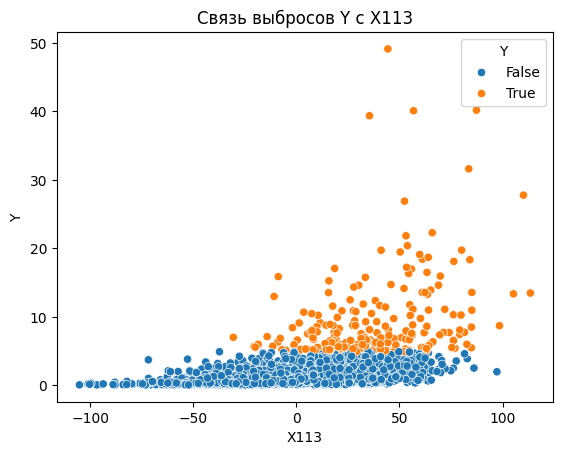

In [ ]:
# –ü—Ä–∏–º–µ—Ä –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ X113
sns.scatterplot(data=train, x="X113", y="Y", hue=(train['Y'] > upper_bound))
plt.title("–°–≤—è–∑—å –≤—ã–±—Ä–æ—Å–æ–≤ Y —Å X113")
plt.show()


**–í—ã–≤–æ–¥:**

–ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤—ã–±—Ä–æ—Å—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π –∑–Ω–∞—á–µ–Ω–∏—è, –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–¥–∞–ª–µ–Ω–Ω—ã–µ –æ—Ç –æ—Å–Ω–æ–≤–Ω–æ–π –º–∞—Å—Å—ã –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—ã–µ –æ—à–∏–±–∫–∏ –∏–ª–∏ —à—É–º –≤ –¥–∞–Ω–Ω—ã—Ö. –¢–∞–∫–∏–µ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –≤–µ—Ä–æ—è—Ç–Ω–æ, –∏—Å–∫–∞–∂–∞—é—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏ –º–æ–≥—É—Ç –Ω–µ –Ω–µ—Å—Ç–∏ –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞.





In [6]:
# –†–∞—Å—Å—á–∏—Ç–∞–µ–º IQR –¥–ª—è –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df < lower_bound) | (df > upper_bound)

# –ü—Ä–∏–º–µ–Ω–∏–º –∫ –æ–±—É—á–∞—é—â–∏–º –¥–∞–Ω–Ω—ã–º
outliers = detect_outliers(train.drop(columns=['Y']))  # –ò—Å–∫–ª—é—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é

# –°–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
outlier_counts = outliers.sum(axis=0)
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:")
print(outlier_counts)



–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
X1      13
X2      15
X3      19
X4      15
X5      21
        ..
X116     8
X117    14
X118    16
X119    14
X120    21
Length: 120, dtype: int64


In [7]:
# –£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df >= lower_bound) & (df <= upper_bound)]

# –ü—Ä–∏–º–µ–Ω—è–µ–º –∫ –¥–∞–Ω–Ω—ã–º
train_clean = train.copy()
for col in train.columns:
    if col != 'Y':
        train_clean = train_clean[(train_clean[col] >= train_clean[col].quantile(0.25) - 1.5 * (train_clean[col].quantile(0.75) - train_clean[col].quantile(0.25))) &
                                  (train_clean[col] <= train_clean[col].quantile(0.75) + 1.5 * (train_clean[col].quantile(0.75) - train_clean[col].quantile(0.25)))]


**–ó–∞–∫–ª—é—á–µ–Ω–∏–µ:**

–ú—ã –ø—Ä–æ–≤–µ–ª–∏ –∞–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –∫–∞–∫ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —Ç–∞–∫ –∏ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤, –∏ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –º–æ–∂–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –≤—ã–±—Ä–æ—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å —É–¥–∞–ª–µ–Ω—ã. –û–¥–Ω–∞–∫–æ —Å—Ç–æ–∏—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å, —á—Ç–æ –ø—Ä–∏—Ä–æ–¥–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–∞–º –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞, –∏ —Ç–∞–∫–∏–µ –≤—ã–±—Ä–æ—Å—ã –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º —Å–ø–µ—Ü–∏—Ñ–∏–∫–∏ –∏—Å—Å–ª–µ–¥—É–µ–º–æ–π –æ–±–ª–∞—Å—Ç–∏. –ü—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –º—ã —É—á—Ç–µ–º –Ω–∞–ª–∏—á–∏–µ —ç—Ç–∏—Ö –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –ø—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫ –æ–Ω–∏ –≤–ª–∏—è—é—Ç –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ, –ø–æ—Å–ª–µ —á–µ–≥–æ –ø—Ä–∏–º–µ–º –æ–±–æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –æ –¥–∞–ª—å–Ω–µ–π—à–µ–π –æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö.

# **ML-–º–æ–¥–µ–ª—å**

In [8]:
# –£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –∏–∑ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö
X_train = train_clean.drop(columns=['Y'])
y_train = train_clean['Y']

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç StandardScaler
scaler = StandardScaler()

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –∫ –æ–±—É—á–∞—é—â–µ–º—É –Ω–∞–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö
X_train= scaler.fit_transform(X_train)

#  –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π
X_test = test.drop(columns=['Y'])
y_test = test['Y']
# –ü—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –∫ —Ç–µ—Å—Ç–æ–≤–æ–º—É –Ω–∞–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö (–∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ—Ç –∂–µ scaler)
X_test= scaler.transform(X_test)

In [9]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ —Å —É–ª—É—á—à–µ–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
mlp_model = MLPRegressor(
    hidden_layer_sizes=(400, 150, 100),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42,
    learning_rate_init=0.001,
    alpha=0.0005
)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
mlp_model.fit(X_train, y_train)

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ
y_pred_mlp = mlp_model.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"R^2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è MLP: {r2_mlp}")


R^2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è MLP: 0.8317813191525146


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# –°–æ–∑–¥–∞–Ω–∏–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ç–æ—Ä–∞
# –ò—Å–ø–æ–ª—å–∑—É–µ–º R^2 –∫–∞–∫ –º–µ—Ç—Ä–∏–∫—É –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
r2_scorer = make_scorer(r2_score)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏
mlp_model = MLPRegressor(
    hidden_layer_sizes=(400, 150, 100),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42,
    learning_rate_init=0.001,
    alpha=0.0005
)

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ —Å 5 —Ñ–æ–ª–¥–∞–º–∏
cv_scores = cross_val_score(mlp_model, X_train, y_train, cv=10, scoring=r2_scorer)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(f"–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è (R^2) - –°—Ä–µ–¥–Ω–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç: {cv_scores.mean():.4f}")
print(f"–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è (R^2) - –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {cv_scores.std():.4f}")

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –≤—Å–µ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
mlp_model.fit(X_train, y_train)

# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
y_pred_mlp = mlp_model.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"R^2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è MLP: {r2_mlp:.4f}")


–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è (R^2) - –°—Ä–µ–¥–Ω–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç: 0.8891
–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è (R^2) - –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.0399
R^2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è MLP: 0.8074


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –≤—ã—Å–æ–∫–∏–π —Å—Ä–µ–¥–Ω–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å
ùëÖ2‚Äî 0.8891, —Å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∑–∫–∏–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ–º 0.0399, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞—Ö –¥–∞–Ω–Ω—ã—Ö.

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ —Ñ–∞–π–ª
joblib.dump(mlp_model, '/content/mlp_model.pkl')

['/content/mlp_model.pkl']

–í —Ñ–∞–π–ª–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ –Ω–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç R¬≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –í –æ—Ç–Ω–æ—à–µ–Ω–∏–∏ –≤—ã–±—Ä–æ—Å–æ–≤ –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ —É–¥–∞–ª–∏—Ç—å –∏—Ö, –∏—Å—Ö–æ–¥—è –∏–∑ –∞–Ω–∞–ª–∏–∑–∞ –∏—Ö –≤–æ–∑–¥–µ–π—Å—Ç–≤–∏—è –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏.

# **DL-–º–æ–¥–µ–ª—å**

In [14]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –Ω–∞ –æ–±—É—á–∞—é—â–∏–π –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–π
X_train, X_val, y_train, y_val = train_test_split(train_clean.drop(columns=['Y']), train_clean['Y'], test_size=0.2, random_state=42)

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç StandardScaler
scaler = StandardScaler()

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –∫ –æ–±—É—á–∞—é—â–µ–º—É –Ω–∞–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö
X_train = scaler.fit_transform(X_train)

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –∫ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º—É –Ω–∞–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö (–∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ—Ç –∂–µ scaler)
X_val = scaler.transform(X_val)

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π
X_test = test.drop(columns=['Y'])
y_test = test['Y']

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –∫ —Ç–µ—Å—Ç–æ–≤–æ–º—É –Ω–∞–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö (–∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ—Ç –∂–µ scaler)
X_test = scaler.transform(X_test)




In [11]:
# –£–ª—É—á—à–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],)),  # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–π—Ä–æ–Ω–æ–≤ –≤ –ø–µ—Ä–≤–æ–º —Å–ª–æ–µ
    LeakyReLU(alpha=0.2),
    BatchNormalization(),  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
    Dropout(0.3),  # Dropout –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è

    Dense(256),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),

    Dense(1)  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
optimizer = Adam(learning_rate=0.0001)
dl_model.compile(optimizer=optimizer, loss='mean_squared_error')

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ EarlyStopping –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
history = dl_model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_val, y_val),  # –í–∞–ª–∏–¥–∞—Ü–∏—è –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ
    callbacks=[early_stopping],  # –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ä–∞–Ω–Ω–µ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏
    verbose=1
)


Epoch 1/1000
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 20ms/step - loss: 1.0012 - val_loss: 0.5057
Epoch 2/1000
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.8949 - val_loss: 0.4913
Epoch 3/1000
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step - loss: 0.7555 - val_loss: 0.5036
Epoch 4/1000
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 12ms/step - loss: 0.9080 - val_loss: 0.5248
Epoch 5/1000
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - loss: 0.6372 - val_loss: 0.5478
Epoch 6/1000
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 0.6899 - val_loss: 0.5240
Epoch 7/1000
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.8252 - val_loss: 0.5079
Epoch 8/1000
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - loss: 1.0414 - va

In [ ]:
# –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ
y_pred_dl = dl_model.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
r2_dl = r2_score(y_test, y_pred_dl)
print(f"R^2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è  DL –º–æ–¥–µ–ª–∏: {r2_dl}")

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 15ms/step
R^2 –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —É–ª—É—á—à–µ–Ω–Ω–æ–π DL –º–æ–¥–µ–ª–∏: 0.8121069363967981


In [ ]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≤ —Ñ–æ—Ä–º–∞—Ç–µ .keras
dl_model.save('/content/dl_model.keras')